In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(x))

class perceptron():
    def __init__(self,N_perceptrons):
        self.N_perceptrons=N_perceptrons
    def data(self,L_inputs,N_inputs,inputs,inputs_result):
        #It is expected an input as array
        # The output should be binary 0 or 1
        aux_1=np.zeros(N_inputs+1)
        aux_1[0:N_inputs]=inputs_result
        inputs_result=aux_1
        self.inputs=np.array(inputs)
        self.results=np.array(inputs_result)
        self.N_inputs=N_inputs
        self.L_inputs=L_inputs
        
    def trainning(self,N_trainning):
        inputs=self.inputs
        IN_results=self.results
        N_perceptrons=self.N_perceptrons
        L_inputs=self.L_inputs
        N_inputs=self.N_inputs
        weights=np.random.uniform(size=(N_perceptrons,L_inputs))
        erro=[0]*N_trainning
        if N_inputs!=1 and N_perceptrons==1:
            counter=0
            while(counter<N_trainning):
                    I=counter%N_inputs
                    aux_1=sigmoid(np.dot(inputs[I,:],weights[0,:]))
                    erro[counter]=0.5*(aux_1-IN_results[I])**2
                    update=aux_1*(1-aux_1)*(IN_results[I]-aux_1)*inputs[I,:]
                    weights[0,:]=weights[0,:]-update
                    counter+=1
            print('erro ---> ',erro[-1],'\n iteration number --> ',counter)
            plt.plot(np.arange(N_trainning),erro)
                    
        elif N_inputs==1 and N_perceptrons==1:
            for u in range(N_trainning):
                aux_1=sigmoid(np.dot(inputs,weights[0,:]))
                erro[u]=0.5*(aux_1-IN_results[0])**2
                update=aux_1*(1-aux_1)*(IN_results[0]-aux_1)*inputs
                weights[0,:]=weights[0,:]-update
            print('erro ---> ',erro[-1],'\niteration number --> ',u)
            plt.plot(np.arange(N_trainning),erro)
        plt.ylabel('ERRO')
        plt.xlabel('ITERATION')
        plt.title('NEURAL NETWORK \n {} PERCEPTRON'.format(N_perceptrons))
        plt.show()       
        self.weights=weights 
        return erro[-1]
        
    def run_NN(self,INPUT):
        weights=self.weights
        INPUT=np.array(INPUT)
        aux_1=sigmoid(np.dot(weights[0,:],INPUT))
        return aux_1
        

    

In [ ]:
import pandas as pd
dados=pd.read_table("pseudo_data_square.csv",sep=" ", header=None)
pseudo_data_square.csv

erro --->  0.00316955828598594 
 iteration number -->  500


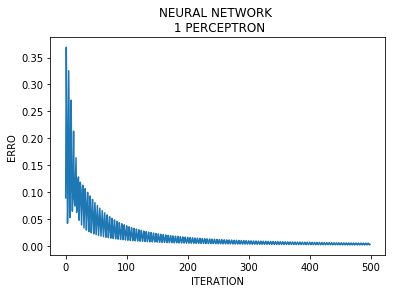

In [14]:
DATA=[[0,0,1],[1,1,1],[1,0,1],[0,1,1]]
RESULTS=[0,1,1,0]
teste=perceptron(1)
teste.data(3,4,DATA,RESULTS)
erro=teste.trainning(500)


In [39]:
import pandas as pd
data=pd.read_csv("pseudo_data_square.csv",sep="\t", header=None)
data.columns=['x','y','results']
DATA_1=np.array(data.x)
DATA_2=np.array(data.y)
RESULTS=np.array(data.results)
END=int(len(DATA_1)*0.6)
DATA_train=np.vstack((DATA_1[:END], DATA_2[:END])).T
RESULTS_train=RESULTS[:END]
DATA_check=np.vstack((DATA_1[END:], DATA_2[END:])).T
RESULTS_check=RESULTS[END:]
RESULTS_NN=np.zeros(len(RESULTS[END:]))

erro --->  0.11354880473766397 
 iteration number -->  10000


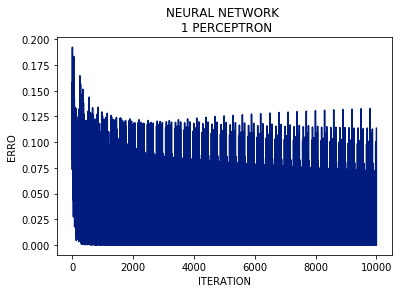

0.11354880473766397


In [37]:
EXP_1=perceptron(1)
EXP_1.data(2,END,DATA_train,RESULTS_train)
erro=EXP_1.trainning(10000)
print(erro)

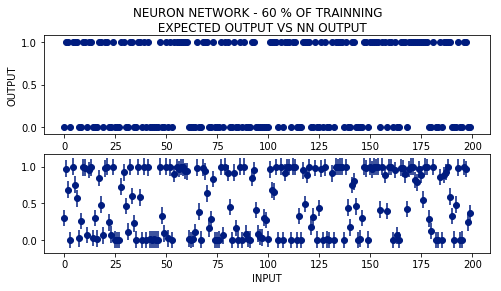

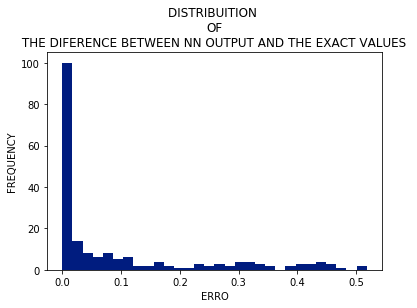

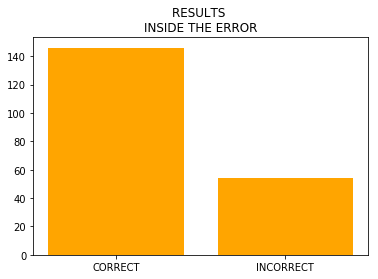

In [38]:
for i in range(len(DATA_check)):
    RESULTS_NN[i]=EXP_1.run_NN(DATA_check[i])
    
fig, axs = plt.subplots(2,figsize=(8,4))
plt.suptitle('NEURON NETWORK - 60 % OF TRAINNING \n EXPECTED OUTPUT VS NN OUTPUT')

x1=np.arange(len(RESULTS_NN))

axs[1].errorbar(x1,RESULTS_NN,yerr=erro, fmt='o',label="CORRECT OUTUPTS")
axs[0].scatter(x1,RESULTS_check,label="NN OUTUPTS")
axs[1].set_xlabel('INPUT')
axs[0].set_ylabel('OUTPUT')
#plt.tight_layout()
plt.show()

ERRO=np.fabs(RESULTS_check-RESULTS_NN)
plt.hist(ERRO,bins=30)
plt.title("DISTRIBUITION \nOF\n THE DIFERENCE BETWEEN NN OUTPUT AND THE EXACT VALUES ")
plt.ylabel('FREQUENCY')
plt.xlabel('ERRO')
plt.style.use('seaborn-dark-palette')
plt.show()

X2=np.array([(ERRO<=erro).sum(),(ERRO>erro).sum()])
Label=['CORRECT','INCORRECT']
plt.bar(np.arange(len(X2)),X2,color='orange')
plt.title('RESULTS \nINSIDE THE ERROR')
plt.xticks(np.arange(len(Label)),labels=Label)
plt.style.use('seaborn-dark-palette')
plt.show()